# PyGeM
## Tutorial 4: Radial Basis Functions interpolation technique on a cube

In this tutorial we will show how to use the Radial Basis Functions interpolation technique to deform a cube.

First of all we import the required PyGeM classes, we import numpy and we set matplotlib for the notebook.

In [1]:
%matplotlib inline
from pygem import RBFParameters, RBF
import numpy as np
import matplotlib.pyplot as plt

We need to set the deformation parameters: we can set manually, by editing the `RBFParameters` attributes, or we can read them by parsing a file. Moreover, we can save a `RBFParameters` instance to a file in order to edit this for the future deformations.

In [2]:
params = RBFParameters()
params.read_parameters(filename='../tests/test_datasets/parameters_rbf_cube.prm')

The following is the parameters file for this particular case. The Radial Basis Functions section describes the basis functions to use. Here we use Gaussian splines with the distance parameter equal to 0.5 (see the documentation of the [RBF](http://mathlab.github.io/PyGeM/radial.html) class for more details). As control points we consider the 8 vertices of the cube (the first one is not exactly the vertex), and we move 3 of them. In the Control points section there are all the coordinates of the control points.

In [3]:
%cat ../tests/test_datasets/parameters_rbf_cube.prm


[Radial Basis Functions]
# This section describes the radial basis functions shape.

# basis funtion is the name of the basis functions to use in the transformation. The functions
# implemented so far are: gaussian_spline, multi_quadratic_biharmonic_spline,
# inv_multi_quadratic_biharmonic_spline, thin_plate_spline, beckert_wendland_c2_basis, polyharmonic_spline.
# For a comprehensive list with details see the class RBF.
basis function: gaussian_spline

# radius is the scaling parameter r that affects the shape of the basis functions. See the documentation
# of the class RBF for details.
radius: 0.5

# The power parameter k for polyharmonic spline
# See the documentation for details
power: 2


[Control points]
# This section describes the RBF control points.

# original control points collects the coordinates of the interpolation control points before the deformation.
original control points: -.1   0.0   0.0
                         0.0   0.0   1.0
                         0.0   1.0  

Here we create a $10 \times10 \times 10$ lattice to mimic a cube.

In [4]:
nx, ny, nz = (10, 10, 10)
mesh = np.zeros((nx * ny * nz, 3))

xv = np.linspace(0, 1, nx)
yv = np.linspace(0, 1, ny)
zv = np.linspace(0, 1, nz)
z, y, x = np.meshgrid(zv, yv, xv)

mesh = np.array([x.ravel(), y.ravel(), z.ravel()])
mesh = mesh.T

Now we plot the points to see what we are doing.

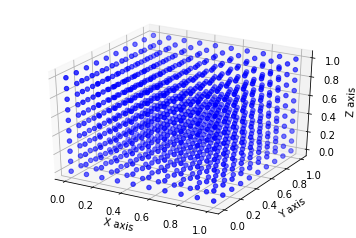

In [5]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mesh[:, 0], mesh[:, 1], mesh[:, 2], c='blue', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

With the utils module we can also plot the original control points and the deformed ones.

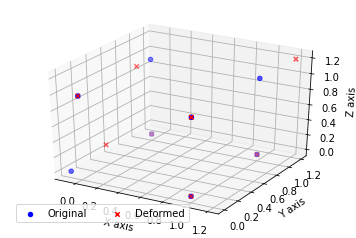

In [6]:
params.plot_points()

There is also the possibility to save the control points in VTK in order to visualize them together with the mesh file.

In [7]:
params.save_points(filename='point.vtk')

Finally we perform the RBF interpolation using the `RBF` class.

In [8]:
rbf = RBF(params, mesh)
rbf.perform()
new_mesh_points = rbf.modified_mesh_points

We can plot the new points in order to see the deformation. Try different basis functions and radius to better fit your specific problem.

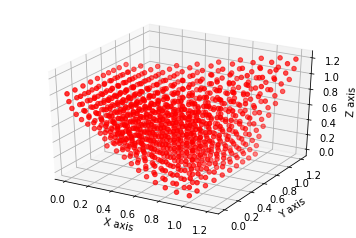

In [9]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_mesh_points[:, 0], new_mesh_points[:, 1], new_mesh_points[:, 2], c='red', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()